<a href="https://colab.research.google.com/github/SeunghyeChae/tmdhey/blob/main/Arrhythmia_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/cakd_colab/python_practice/dataset/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import BatchNormalization


/content/drive/MyDrive/cakd_colab/python_practice/dataset/archive/mitbih_test.csv
/content/drive/MyDrive/cakd_colab/python_practice/dataset/archive/mitbih_train.csv
/content/drive/MyDrive/cakd_colab/python_practice/dataset/archive/ptbdb_abnormal.csv
/content/drive/MyDrive/cakd_colab/python_practice/dataset/archive/ptbdb_normal.csv


# Check data 

In [38]:
df= pd.read_csv('/content/drive/MyDrive/cakd_colab/python_practice/dataset/archive/mitbih_train.csv',
                header=None, index_col= False)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# class: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
df[187].unique()

array([0., 1., 2., 3., 4.])

# EDA

In [40]:
type_a= ['Non Ectopic beats (Normal beats)', 'Supraventrical ectopic beats', 
         'Ventricular ectopic beats','Fusion beats', 'Unknown beats']

df.loc[df[187]==0, 'name_match'] = type_a[0]
df.loc[df[187]==1, 'name_match'] = type_a[1]
df.loc[df[187]==2, 'name_match'] = type_a[2]
df.loc[df[187]==3, 'name_match'] = type_a[3]
df.loc[df[187]==4, 'name_match'] = type_a[4]

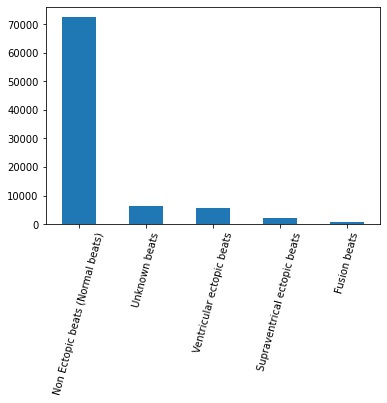

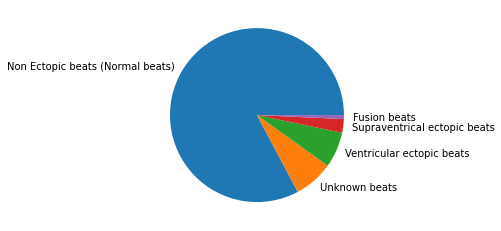

In [41]:
df['name_match'].value_counts().plot(kind='bar', rot=75)
plt.show()

df['name_match'].value_counts().plot(kind='pie', ylabel='')
plt.show()

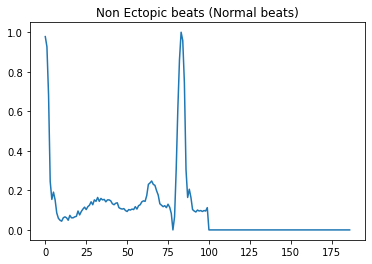

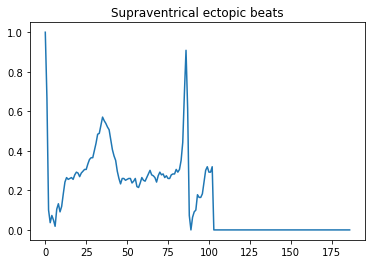

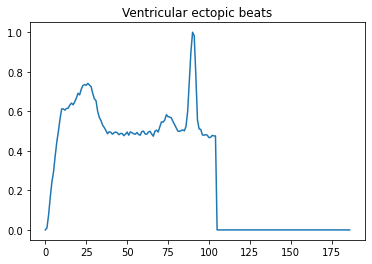

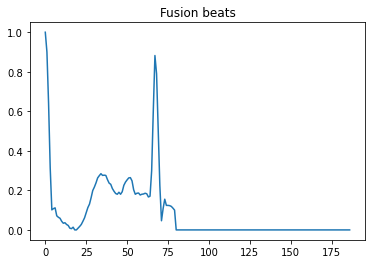

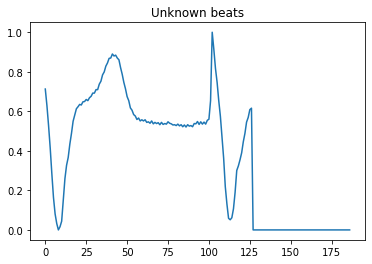

In [42]:
cond= df[187].unique()
type_a = ["Non Ectopic beats (Normal beats)",'Supraventrical ectopic beats',
          "Ventricular ectopic beats",'Fusion beats','Unknown beats']

for a in cond:
  df1= df[df[187]==a].head(1)
  aa= df1.loc[:,0:186].to_numpy()
  xx= np.arange(0,187)
  plt.plot(xx,aa[0])
  plt.title(type_a[int(a)])
  plt.show()

In [43]:
x = df.loc[:,0:186]
y = df.loc[:,187]

# nn

In [44]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y= encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)

dummy_y= np_utils.to_categorical(encoded_Y)
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [45]:
X_train, X_test, y_train, y_test= train_test_split(x, dummy_y, test_size=0.01,
                                                   random_state=42)

In [46]:
batchnorm_model= Sequential()
# Add the first layer
batchnorm_model.add(Dense(50,activation='sigmoid',input_shape=(187,), 
                          kernel_initializer='normal'))
batchnorm_model.add(Dense(50, activation='sigmoid', kernel_initializer='normal'))
batchnorm_model.add(Dense(50, activation='sigmoid', kernel_initializer='normal'))
batchnorm_model.add(Dense(50, activation='sigmoid', kernel_initializer='normal'))
batchnorm_model.add(Dense(5, activation='softmax', kernel_initializer='normal'))

In [47]:
batchnorm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                9400      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 255       
Total params: 17,305
Trainable params: 17,305
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile your model with sgd
batchnorm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=15, verbose=1)

Epoch 1/15
2709/2709 [==============================] - 5s 2ms/step - loss: 0.5064 - accuracy: 0.8609 - val_loss: 0.3837 - val_accuracy: 0.8984
Epoch 2/15
2709/2709 [==============================] - 6s 2ms/step - loss: 0.3482 - accuracy: 0.9122 - val_loss: 0.3120 - val_accuracy: 0.9212
Epoch 3/15
2709/2709 [==============================] - 5s 2ms/step - loss: 0.2785 - accuracy: 0.9299 - val_loss: 0.2192 - val_accuracy: 0.9509
Epoch 4/15
2709/2709 [==============================] - 5s 2ms/step - loss: 0.2493 - accuracy: 0.9360 - val_loss: 0.1989 - val_accuracy: 0.9521
Epoch 5/15
2709/2709 [==============================] - 5s 2ms/step - loss: 0.2276 - accuracy: 0.9396 - val_loss: 0.1922 - val_accuracy: 0.9498
Epoch 6/15
2709/2709 [==============================] - 6s 2ms/step - loss: 0.2082 - accuracy: 0.9429 - val_loss: 0.1534 - val_accuracy: 0.9521
Epoch 7/15
2709/2709 [==============================] - 5s 2ms/step - loss: 0.1899 - accuracy: 0.9484 - val_loss: 0.1401 - val_accuracy:

In [49]:
preds = batchnorm_model.predict(X_test)
preds_rounded = np.round(preds)
preds
accuracy2 = batchnorm_model.evaluate(X_test, y_test)
accuracy2[1]

28/28 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9692


0.9691780805587769

In [50]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(preds, axis = 1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       725
           1       1.00      0.60      0.75        20
           2       0.89      0.88      0.88        64
           3       0.40      0.40      0.40         5
           4       0.95      0.95      0.95        62

    accuracy                           0.97       876
   macro avg       0.84      0.76      0.79       876
weighted avg       0.97      0.97      0.97       876



# test data

In [51]:
df1 = pd.read_csv("/content/drive/MyDrive/cakd_colab/python_practice/dataset/archive/mitbih_test.csv", header = None, index_col = False)
x_test1 = df1.loc[:,0:186]
y_test1 = df1.loc[:,187]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test1)
encoded_Y = encoder.transform(y_test1)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y)
dummy_y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [52]:
accuracy_test = batchnorm_model.evaluate(x_test1, dummy_y_test)
preds_1 = batchnorm_model.predict(x_test1)
print(classification_report(np.argmax(dummy_y_test, axis=1), np.argmax(preds_1, axis = 1)))

685/685 [==============================] - 1s 2ms/step - loss: 0.1318 - accuracy: 0.9657
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18118
           1       0.88      0.55      0.68       556
           2       0.92      0.86      0.89      1448
           3       0.52      0.46      0.49       162
           4       0.96      0.95      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.85      0.76      0.80     21892
weighted avg       0.96      0.97      0.96     21892



# Wrong Predictions Analysis


In [53]:
ch1 = pd.DataFrame(np.rint(preds_1))
ch1.head()

ch1.loc[ch1[0] == 1.0 , 'pred'] = 0  
ch1.loc[ch1[1] == 1.0, 'pred'] = 1  
ch1.loc[ch1[2] == 1.0, 'pred'] = 2  
ch1.loc[ch1[3] == 1.0, 'pred'] = 3  
ch1.loc[ch1[4] == 1.0, 'pred'] = 4  
ch1.loc[(ch1[1] == 0) & (ch1[2] == 0) & (ch1[3] == 0) & (ch1[4] == 0), 'pred'] = 0
ch1.pred

df1_test = pd.concat([df1,ch1['pred']],axis = 1)

df1_test['compare'] = np.where(df1_test['pred']==df1_test[187], 
                                           'yes', 'no')

In [54]:
df1_test_1 = df1_test[df1_test["compare"]=='no']
df1_test_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,pred,compare
213,1.000000,0.883523,0.480114,0.000000,0.076705,0.207386,0.295455,0.340909,0.326705,0.363636,0.369318,0.375000,0.383523,0.417614,0.417614,0.451705,0.491477,0.502841,0.534091,0.553977,0.585227,0.593750,0.616477,0.610795,0.588068,0.593750,0.553977,0.508523,0.471591,0.463068,0.417614,0.383523,0.369318,0.360795,0.363636,0.346591,0.321023,0.340909,0.340909,0.326705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no
287,0.912752,0.702461,0.581656,0.375839,0.281879,0.196868,0.176734,0.183445,0.172260,0.174497,0.176734,0.172260,0.161074,0.167785,0.149888,0.125280,0.107383,0.093960,0.058166,0.029083,0.022371,0.000000,0.000000,0.017897,0.049217,0.073826,0.098434,0.125280,0.156600,0.183445,0.194631,0.234899,0.263982,0.261745,0.263982,0.272931,0.272931,0.281879,0.277405,0.266219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,no
290,0.344595,0.344595,0.506757,0.709459,0.864865,0.905405,0.932432,0.891892,0.912162,0.898649,0.871622,0.831081,0.783784,0.682432,0.641892,0.560811,0.486486,0.425676,0.351351,0.310811,0.344595,0.317568,0.358108,0.324324,0.304054,0.317568,0.304054,0.317568,0.317568,0.270270,0.277027,0.189189,0.189189,0.216216,0.270270,0.141892,0.148649,0.135135,0.121622,0.114865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no
345,0.674185,0.602757,0.382206,0.136591,0.036341,0.013784,0.003759,0.003759,0.001253,0.000000,0.007519,0.042607,0.076441,0.154135,0.233083,0.290727,0.334586,0.392231,0.489975,0.562657,0.670426,0.725564,0.781955,0.850877,0.835840,0.800752,0.823308,0.808271,0.854637,0.832080,0.832080,0.863409,0.921053,0.794486,0.815789,0.855890,0.779449,0.778196,0.778196,0.667920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,no
620,1.000000,0.558442,0.402597,0.379221,0.327273,0.168831,0.218182,0.220779,0.272727,0.111688,0.036364,0.306494,0.259740,0.145455,0.127273,0.174026,0.181818,0.197403,0.176623,0.103896,0.262338,0.200000,0.135065,0.194805,0.176623,0.223377,0.155844,0.267532,0.233766,0.290909,0.251948,0.194805,0.303896,0.342857,0.283117,0.270130,0.345455,0.277922,0.215584,0.197403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,no


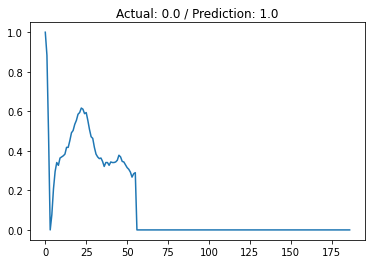

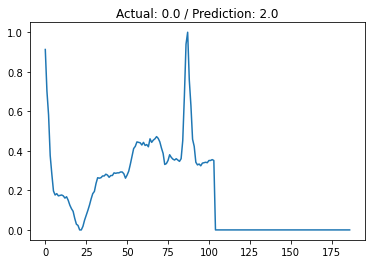

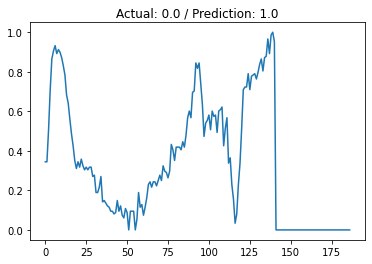

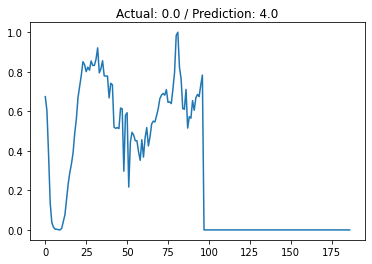

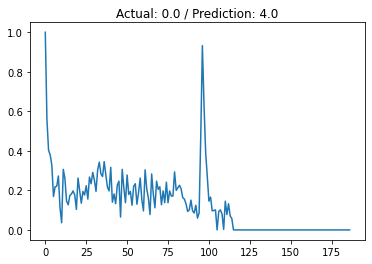

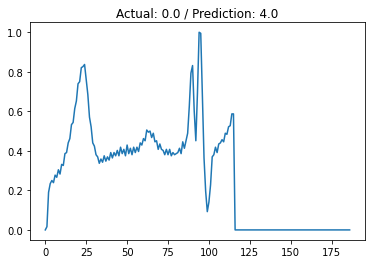

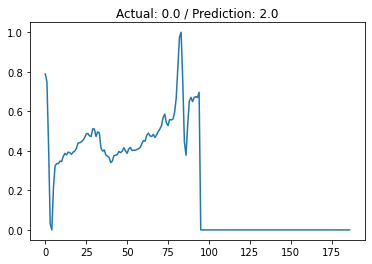

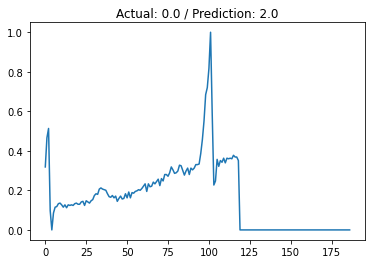

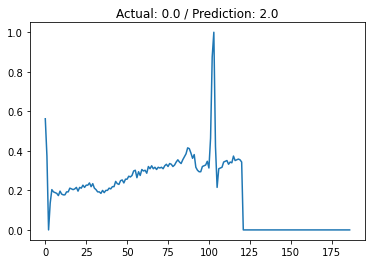

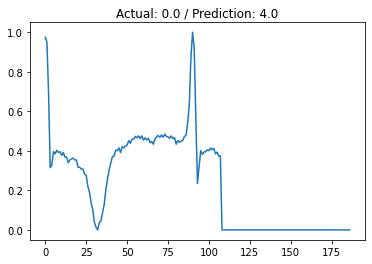

In [55]:
for i in range(10):
    aa = df1_test_1.loc[:,0:186].to_numpy()
    aa1 = df1_test_1.loc[:,187:'pred'].to_numpy()
    xx = np.arange(0,187)
    plt.plot(xx,aa[i])
    plt.title("Actual: {} / Prediction: {}".format(aa1[i][0],aa1[i][1]))
    plt.show()